In [1]:
import numpy as np
import struct
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import cv2
import math

# warpaffine

uint8
200


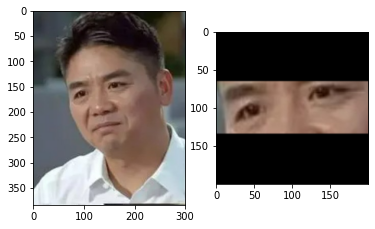

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def crop_resize_to(src, roi, dst):

    # -------------- ROI cropping ------------------
    x, y, r, b = roi
    roi_img = src[y: b,x: r,...]
    rh, rw, _ = roi_img.shape

    # -------------- Transformation M ------------------
    dst_h, dst_w = dst.shape[:2]
    scale   = min(dst_h/rh, dst_w/rw) # 短边对齐，原图是分母
    translation_w = -rw*0.5*scale + dst_w*0.5
    translation_h = -rh*0.5*scale + dst_h*0.5

    M = np.array([[scale, 0, translation_w],
                    [0, scale, translation_h]])

    # -------------- WarpAffine ------------------
    cv2.warpAffine(roi_img, M, (dst_w, dst_h), dst = dst)


img = cv2.imread("./imgs/lqd.jpg")
plt.subplot(1, 2, 1)
plt.imshow(img[...,::-1])

dst = np.zeros((200,200,3), dtype= np.uint8) #! 一般的，我们都主动去指定一个array 是什么dtype
crop_resize_to(img, roi = (63, 138, 203, 186), dst = dst) #! 一定一定一定要用与src相同的dtype来承接
print(dst.dtype)
print(np.max(dst))

plt.subplot(1, 2, 2)
plt.imshow(dst[...,::-1])


